<br>

## Best Streaming Service Analysis

In this project, I will analyse the main streamming services like Netflix, Amazon Prime Video, Disney+, Hulu.

In [31]:
pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68739 sha256=b84e70026413b4740722a648bfa26bec716e9a29c52bbe467eafa0dbe866b1f3
  Stored in directory: c:\users\tanvi\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


<br>

**Import the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
fig = go.Figure()

import plotly.express as px 
%matplotlib inline

In [3]:
data = pd.read_csv('moviestreams.csv')
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Rotten Tomatoes is an American review-aggregation website for film and television.

In [4]:
cols = data.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [5]:
data.drop(['Unnamed: 0','ID',], axis=1, inplace = True)
cols = data.columns.tolist()
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

## data cleaning

In [6]:
print("Percentage Missing Data")
(data.isnull().sum()/data.shape[0])*100

Percentage Missing Data


Title               0.000000
Year                0.000000
Age                56.079790
IMDb                3.410177
Rotten Tomatoes    69.194935
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
Directors           4.335882
Genres              1.642379
Country             2.597946
Language            3.577401
Runtime             3.535595
dtype: float64

In [7]:
data.Age.value_counts()


18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

In [8]:
age_map = {'18+' : 18, '7+' : 7, '13+': 13, 'all' : 0, '16+' : 16}
data['intAge'] = data['Age'].map(age_map)

In [10]:
data['Rotten Tomatoes'].value_counts().sort_values(ascending=False)


100%    407
80%     162
50%     136
83%     131
67%     126
       ... 
28%      10
7%       10
4%        9
3%        4
2%        4
Name: Rotten Tomatoes, Length: 99, dtype: int64

## Process Rotten Tomatoes column and convert it to remove %.


In [12]:
data['New_Rotten_Tomatoes'] = data['Rotten Tomatoes'].str.replace("%","")
for i in data['New_Rotten_Tomatoes']:
    if i is str:
        i = i.astype(int)

In [15]:
data['New_Rotten_Tomatoes']


0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: New_Rotten_Tomatoes, Length: 16744, dtype: object

## Visualisations

Checking Number of Movies in a given Age group per Streaming Service


In [16]:
data['Age'].value_counts().plot('bar', xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in All services")

Most movies are rated as 18+ and very less are fit for all age groups!


Analyzing number of Movies in speific age group in NetFlix


In [17]:
data_netflix = data.copy()
data_netflix = data_netflix[data['Netflix']==1]
data_netflix['Age'].value_counts().iplot('bar', colors='Blue', xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in NetFlix")

Around 1/5 of 18+ movies, 1/4 13+ moveis, 1/5 7+ moveis and 1/4 16+ movies are from NetFlix


In [18]:
data_hulu = data.copy()
data_hulu = data_hulu[data['Hulu']==1]
data_hulu['Age'].value_counts().iplot('bar', colors='Red', xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in Hulu")

Around 1/11 of 18+ movies, 1/10 13+ moveis, 1/13 7+ moveis and 1/19 16+ movies are from Hulu


In [20]:
data_prime = data.copy()
data_prime = data_prime[data['Prime Video']==1]
data_prime['Age'].value_counts().iplot('bar', colors='Black', xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in Prime Video")

In [21]:
data_disney = data.copy()
data_disney = data_disney[data['Disney+']==1]
data_disney['Age'].value_counts().iplot('bar', colors='Purple', 
                                        xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in Disney+")

Most of the movies streamed on Disney+ is suitable for all age gorup. We can see that, per the dataset only 3 18+ movies are listed in the Disney+

## Rotten Tomatoes Score

## A Tomatometer score is calculated for a movie or TV show after it receives at least five reviews. When at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status.

## Rotten Tomatoes gives films a score out of 100 based on the averaged reviews of professional film critics. If a film gets a rating of 60 or more it gets a 'fresh' red tomato on the site. Less than 60 and it gets a rotten tomato: Source - Google

In [22]:
data['Rotten Tomatoes'].value_counts().iplot(kind = 'bar', colors = 'Cyan', xTitle = "Ratings", yTitle="Number of Movies", title="Overall Rotten Tomato Ratings")


In [23]:
rotten_tomato_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [data_prime['Rotten Tomatoes'].value_counts()[0], 
                                                             data_hulu['Rotten Tomatoes'].value_counts()[0],
                                                             data_disney['Rotten Tomatoes'].value_counts()[0],
                                                             data_netflix['Rotten Tomatoes'].value_counts()[0]]})
rotten_tomato_scores.head()

,Streaming Service,Rotten Tomato Score
0,Prime Video,257
1,Hulu,18
2,Disney+,19
3,NetFlix,130


In [24]:
rotten_tomato_scores.sort_values(ascending=False, by="Rotten Tomato Score").iplot(kind='bar', x='Streaming Service', y='Rotten Tomato Score', 
                           color='Violet', xTitle="Streaming Service", 
                           yTitle="Count of Movies with Score of 100%", 
                           title="Streaming Service with 100% Rotten Tomato Score")

Prime is home to most movies with 100% Rotten Tomato Score


## IMDB Ratings


In [25]:
data['IMDb'].value_counts().iplot(kind="bar", color="Red", xTitle='IMDb Ratings', yTitle="Count of Movies", title = "Count of Movies vs IMDb Ratings")


We see that approx 553 movies have IMDb rating as 6.5 where as 407 movies have received Rotten Tomato Rating as 100%!


In [26]:
def get_imdb_count_per_service(d):
    # This function returns the number of movies in a service having IMDb score greater than 7.5
    num_of_movies = 0
    for key,value in d.items():
        if key>=7.5:
            num_of_movies+=value
    return num_of_movies

In [27]:
imdb_prime_count = get_imdb_count_per_service(dict(data_prime['IMDb'].value_counts().sort_values(ascending=False)))
imdb_hulu_count = get_imdb_count_per_service(dict(data_hulu['IMDb'].value_counts().sort_values(ascending=False)))
imdb_disey_count = get_imdb_count_per_service(dict(data_disney['IMDb'].value_counts().sort_values(ascending=False)))
imdb_netflix_count = get_imdb_count_per_service(dict(data_netflix['IMDb'].value_counts().sort_values(ascending=False)))

imdb_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'IMDb Score' :[imdb_prime_count, imdb_hulu_count, imdb_disey_count, imdb_netflix_count] })
imdb_scores.head()

,Streaming Service,IMDb Score
0,Prime Video,1104
1,Hulu,97
2,Disney+,89
3,NetFlix,476


In [28]:
imdb_scores.sort_values(ascending=False, by='IMDb Score').iplot(kind="bar", color="Cyan",x='Streaming Service', 
                  xTitle='Streaming Service', 
                  yTitle="Count of Movies with IMDB Score >=7.5", 
                  title = "Streaming Services with Movies having IMDB >= 7.5")

Prime Video has highest number of movies with IMDB more than 7.5!


## Explore Languages

In [29]:
data['Language'].value_counts()


English                                                                             10955
Hindi                                                                                 503
English,Spanish                                                                       276
Spanish                                                                               267
English,French                                                                        174
                                                                                    ...  
English,German,Hungarian,Romanian                                                       1
English,Spanish,Chinese,Latin                                                           1
English,Danish,Malay,Dutch,Indonesian,Finnish,Luxembourgish,French Sign Language        1
Dutch,French                                                                            1
English,Algonquin                                                                       1
Name: Lang

We see that the data represent - Movie and in which all languages it is available in. But we want is count of every language. As in Number of movies in English, in Spanish and etc.


Getting total languages in dataset


In [30]:
%%time
languages_dict = dict(data['Language'].value_counts())
languages = set()
for lang,count in languages_dict.items():
    curr_lang = lang
    curr_langs = curr_lang.split(",")
    for i in curr_langs:
        if i in languages:
            continue
        else:
            languages.add(i.lower())
languages = list(languages)
print("Total number of languages are : ", len(languages))

Total number of languages are :  178
Wall time: 13 ms


Counting each language


In [31]:
%%time
languages_count = dict()
for lang,count in languages_dict.items():
    curr_lang = lang.split(",")
    for i in curr_lang:
        if i in languages_count.keys():
            languages_count[i] = languages_count.get(i) + 1
        else:
            languages_count[i] = 1

Wall time: 3 ms


We now have a dictionary having all the languages and their count


In [32]:
lang_count_df = pd.DataFrame(languages_count.items(), columns=['Language', 'Count'])
lang_count_df.head()

,Language,Count
0,English,785
1,Hindi,100
2,Spanish,192
3,French,279
4,Italian,129


Plotting Graph for Language and Count


In [33]:
lang_count_df.sort_values(ascending=False, by='Count')[:20].iplot(kind='bar', 
                                                                  x='Language', 
                                                                  xTitle='Language', 
                                                                  yTitle='Count', colors='Green', 
                                                                  title='Language vs Count')

Top 20 languages in Streaming Services

In [ ]:
rt_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [netflix_df['Rotten Tomatoes'].value_counts()[0], 
                                                             prime_df['Rotten Tomatoes'].value_counts()[0],
                                                             Disney_df['Rotten Tomatoes'].value_counts()[0],
                                                             Hulu_df['Rotten Tomatoes'].value_counts()[0]]})
rt_scores.head()

,Streaming Service,Rotten Tomato Score
0,Prime Video,130
1,Hulu,257
2,Disney+,19
3,NetFlix,18


In [34]:
lang_count_df_copy = lang_count_df[:20]
fig = px.pie(values=lang_count_df_copy['Count'], names=lang_count_df_copy['Language']) 
fig.show()

Most of the movies in these Streaming servies are in English.


Movie/Show Runtime


In [36]:
pd.DataFrame(dict(data['Runtime'].value_counts().sort_values(ascending=False)[:20]).items(), columns=['Runtime', 'Count']).iplot(kind='bar' ,
                                                                                                                                 x='Runtime', 
                                                                                                                                 xTitle='Runtime', 
                                                                                                                                 yTitle='Count', title='Runtime vs Count',
                                                                                                                                colors='Magenta')


Most of the movies have run time of approx 90 minutes.


## Directors with Most Movies


In [37]:
len(data['Directors'])


16744

In [38]:
directors = list(set(data['Directors']))
directors.pop(0) #TO REMOVE NAN VALUE
len(directors)

11338

By converting it to Set we reduced the number from 16k to 11k


In [39]:
new_director = set()
for d in directors:
    curr_d = d.split(",")
    for direc in curr_d:
        if direc in new_director:
            continue
        else:
            new_director.add(direc)
len(new_director)

12453

Most of the movies have more than 1 director, hence extarcted all the names of directors in the dataset


In [40]:
%%time
new_data = data[data['Directors'].notna()]
directors_count = dict()
direc_in_data = list(new_data['Directors'])
for xdir in direc_in_data:
    curr_dirs = xdir.split(",")
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
        else:
            directors_count[xd] = 1

Wall time: 28 ms


In [41]:
directors_count_df = pd.DataFrame(directors_count.items(), columns=['Director', 'Count'])
directors_count_df.sort_values(ascending=False, by='Count').head()

,Director,Count
976,Jay Chapman,36
8165,Joseph Kane,31
1102,Cheh Chang,29
4826,Jim Wynorski,23
6949,William Beaudine,23


In [42]:
directors_count_df.sort_values(ascending=False, by='Count')[:20].iplot(kind='bar', 
                                                                  x='Director', 
                                                                  xTitle='Director', 
                                                                  yTitle='Count', colors='Blue', 
                                                                  title='Director vs Count')

Jay Chapman has directed most number of movies as per our calculations. Lets see the moveis he has directed

In [43]:
data[data['Directors']=='Jay Chapman']


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge,New_Rotten_Tomatoes
1014,Jim Gaffigan: Obsessed,2014,16+,7.6,100%,1,0,0,0,0,Jay Chapman,"Documentary,Comedy",United States,English,60.0,16.0,100
1234,Iliza Shlesinger: War Paint,2013,NaN,6.7,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,75.0,NaN,NaN
1417,Tom Segura: Completely Normal,2014,NaN,7.8,NaN,1,0,1,0,0,Jay Chapman,"Documentary,Comedy",United States,English,74.0,NaN,NaN
2211,Todd Barry: Spicy Honey,2017,NaN,6.7,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,60.0,NaN,NaN
2331,Craig Ferguson: Tickle Fight,2017,NaN,6.6,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,66.0,NaN,NaN
2393,Colin Quinn: Unconstitutional,2015,NaN,7.1,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,55.0,NaN,NaN
2447,Lucas Brothers: On Drugs,2017,NaN,5.5,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,50.0,NaN,NaN
2523,D.L. Hughley: Contrarian,2018,NaN,6.5,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,58.0,NaN,NaN
2636,D.L. Hughley: Clear,2014,NaN,6.7,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,60.0,NaN,NaN
2721,Moshe Kasher: Live in Oakland,2012,NaN,6.8,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,NaN,61.0,NaN,NaN


Here the List of moveis and other details for movies directed by Jay Chapman.


## Movies available in more than 1 platforms


Movies available in Netflix and Prime Video


In [44]:
temp_data = data[data['Netflix']==1]
temp_data = temp_data[temp_data['Prime Video']==1]
temp_data

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge,New_Rotten_Tomatoes
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0,97
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,18.0,95
11,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0,13.0,100
15,Once Upon a Time in the West,1968,13+,8.5,95%,1,0,1,0,0,Sergio Leone,Western,"Italy,United States","Italian,English,Spanish",165.0,13.0,95
31,Drive,2011,18+,7.8,92%,1,0,1,0,0,Nicolas Winding Refn,"Crime,Drama",United States,"English,Spanish",100.0,18.0,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,Hisss,2010,NaN,2.8,NaN,1,0,1,0,0,Jennifer Lynch,"Comedy,Drama,Horror,Thriller","India,United States","English,Hindi",98.0,NaN,NaN
3440,Coffee with D,2017,13+,4.4,17%,1,0,1,0,0,Vishal Mishra,Comedy,India,NaN,123.0,13.0,17
3445,Cappuccino,2017,NaN,3.8,NaN,1,0,1,0,0,Jon Amiel,Comedy,"United Kingdom,United States",English,112.0,NaN,NaN
3512,Paradise Lost,2017,NaN,NaN,NaN,1,0,1,0,0,NaN,"Drama,Mystery",NaN,NaN,NaN,NaN,NaN


In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


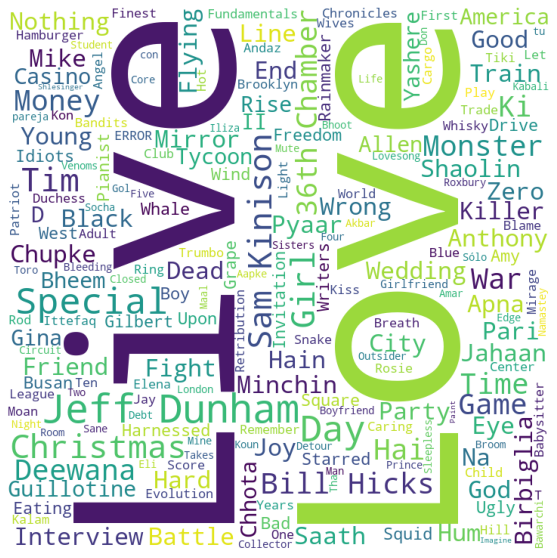

In [47]:
from wordcloud import WordCloud 

plt.subplots(figsize = (10,10))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 720,
                    height = 720
                        ).generate(' '.join(temp_data['Title']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

Movies available in Netflix and Hulu


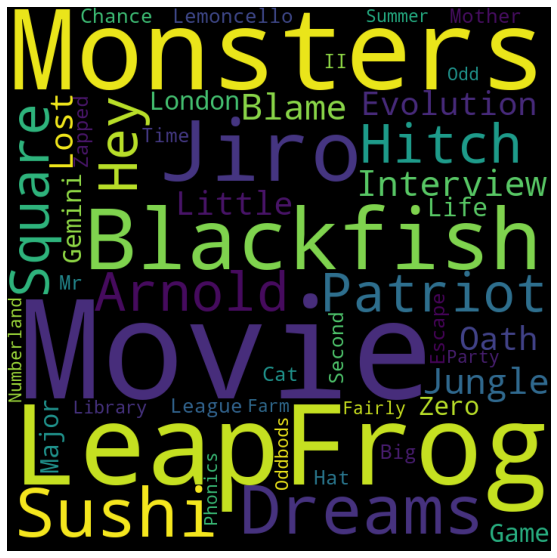

In [48]:
temp_data_nh = data[data['Netflix']==1]
temp_data_nh = temp_data_nh[temp_data_nh['Hulu']==1]
plt.subplots(figsize = (10,10))

wordcloud = WordCloud (
                    background_color = 'black',
                    width = 720,
                    height = 720
                        ).generate(' '.join(temp_data_nh['Title']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

## Exploring Genres

In [49]:
%%time
genres_unclean = dict(data['Genres'].value_counts())
genres = set()
for g,count in genres_unclean.items():
    curr_g = g.split(",")
    for xg in curr_g:
        if xg in genres:
            continue
        else:
            genres.add(xg)

Wall time: 19 ms


In [50]:
%%time
count_genres = dict()
for g,count in genres_unclean.items():
    curr_g = g.split(",")
    for xg in curr_g:
        if xg in count_genres.keys():
            count_genres[xg] = count_genres.get(xg)+1
        else:
            count_genres[xg] = 1

Wall time: 5.99 ms


In [52]:
count_genres_df = pd.DataFrame(count_genres.items(), columns=['Genre', 'Count'])
count_genres_df.sort_values(ascending=False, by='Count').iplot(kind="bar", x='Genre', xTitle='Genre', yTitle='Count', title='Count of Genres', color='pink')


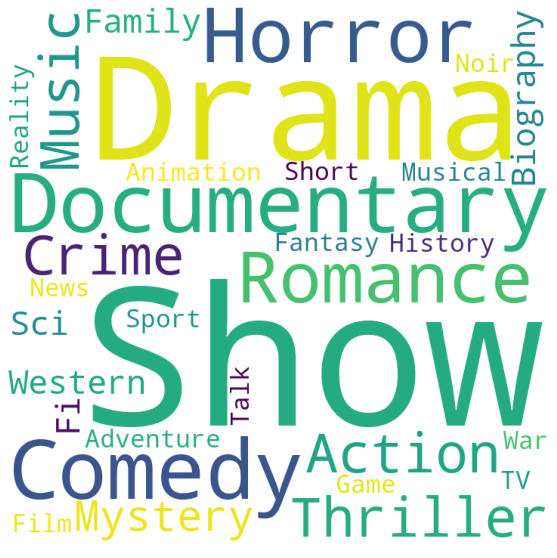

In [53]:
plt.subplots(figsize = (10,10))

wordcloud_genre = WordCloud (
                    background_color = 'white',
                    width = 720,
                    height = 720
                        ).generate(' '.join(count_genres_df['Genre']))
plt.imshow(wordcloud_genre) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

Most of the movies in the platforms belong to Drama genre


## Top Movies in each streaming platforms

In this top movies will be those, having IMDB > 8.5

NetFlix

In [56]:
data_netflix_top = data_netflix[data_netflix['IMDb']>8.5]
data_netflix_top = data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')

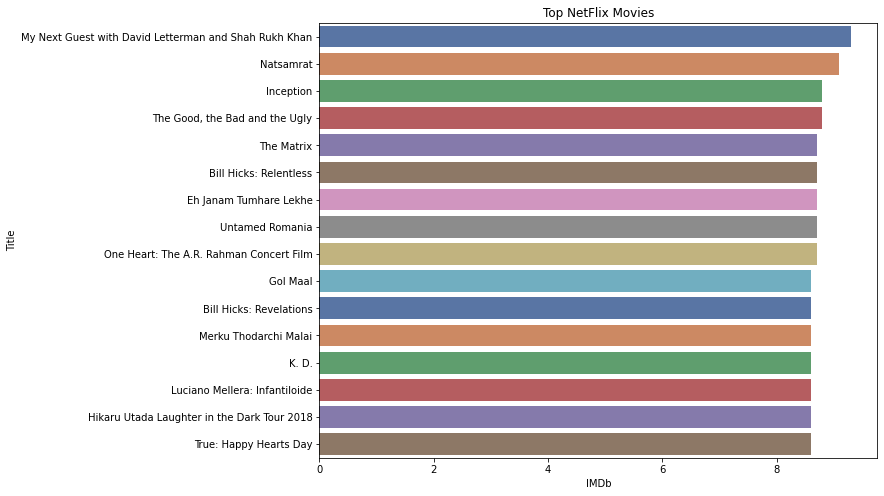

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_netflix_top, palette='deep')
plt.title('Top NetFlix Movies')
plt.show()

Hulu

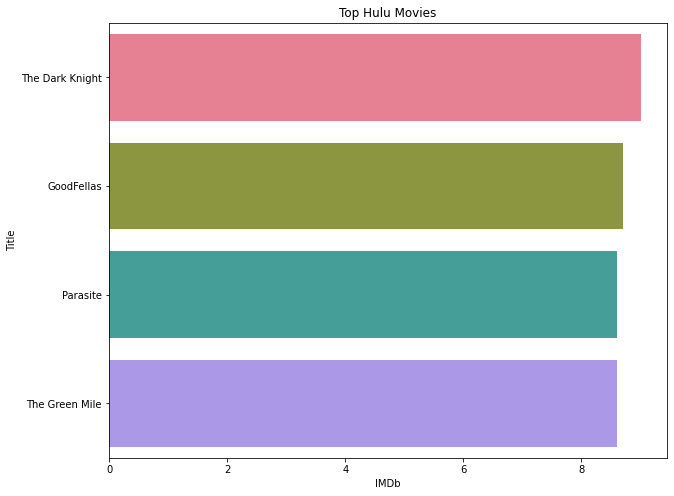

In [58]:
data_hulu_top = data_hulu[data_hulu['IMDb']>8.5]
data_hulu_top = data_hulu_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_hulu_top, palette='husl')
plt.title('Top Hulu Movies')
plt.show()

Diney+

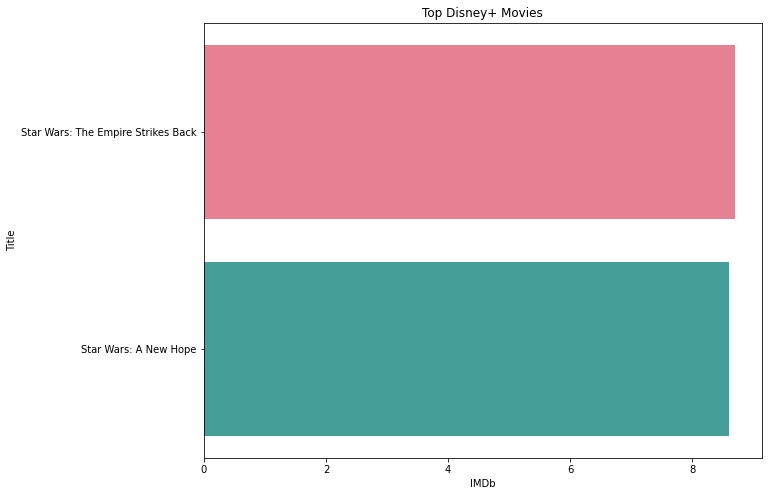

In [59]:
data_disney_top = data_disney[data_disney['IMDb']>8.5]
data_disney_top = data_disney_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_disney_top, palette='husl')
plt.title('Top Disney+ Movies')
plt.show()

Prime Video


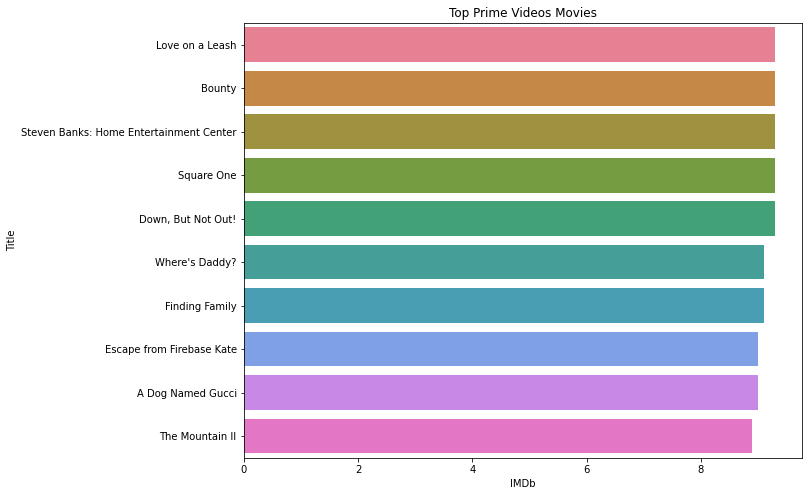

In [60]:
data_prime_top = data_prime[data_prime['IMDb']>8.5]
data_prime_top = data_prime_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')[:10]
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_prime_top, palette='husl')
plt.title('Top Prime Videos Movies')
plt.show()

## Average Runtime of Movies in each Platform


In [61]:
dur_n = round(data_netflix['Runtime'].sum()/data_netflix.shape[0],2)
dur_h = round(data_hulu['Runtime'].sum()/data_hulu.shape[0],2)
dur_p = round(data_prime['Runtime'].sum()/data_prime.shape[0],2)
dur_d = round(data_disney['Runtime'].sum()/data_disney.shape[0],2)
print(dur_n, dur_h, dur_p, dur_d)
duration_df = pd.DataFrame({
    'Streaming Platform' : ['NetFlix','Hulu','Prime Video','Disney+'],
    'Duration' : [dur_n, dur_h, dur_p, dur_d]
})
duration_df.head()
duration_df.sort_values(ascending=False, by='Duration').iplot(kind="bar", x='Streaming Platform', 
                                                              xTitle='Streaming Platform', 
                                                              yTitle='Duration', title='Average Duration', color='Red')

92.83 95.46 89.6 88.98
